In [2]:
from fastai.vision import * 
from functools import partial
import torch
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'


In [3]:
np.random.seed(42) # set random seed so we always get the same validation set
src = (ImageList.from_csv('','clean10dataNoAccent.csv', folder='sclean-spec/specgramImgs')
       # Load data from csv
       .split_by_rand_pct(0.2)
       # split data into training and validation set (20% validation)
       .label_from_df(label_delim=' ')
       # label data using the tags column (second column is default)
)

In [3]:
tfms = get_transforms()
data = (src.transform( tfms ,size=128)
        # Apply transforms and scale images to 128x128
        .databunch(bs=250).normalize(imagenet_stats)
        # Create databunch with batchsize=64 and normalize the images
)

In [4]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
# create cnn with the resnet50 architecture
learn = cnn_learner(data, models.resnet50, metrics=[acc_02)

In [1]:
learn.unfreeze()
learn.lr_find() # find learning rate
learn.recorder.plot(suggestion=True)

NameError: name 'learn' is not defined

In [5]:
learn.fit_one_cycle(50,3.31E-02) # train model for 50 epochs

learn.save('clean10epochs') # save model

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.759266,0.495969,0.517125,0.690341,01:24
1,0.564328,0.312505,0.734500,0.761774,01:21
2,0.432193,0.276973,0.860937,0.767194,01:21
3,0.353362,0.237190,0.838375,0.815969,01:21
4,0.299573,0.242968,0.859312,0.818449,01:21
5,0.263294,0.246262,0.873062,0.812304,01:21
6,0.241027,0.266757,0.859312,0.813609,01:20
7,0.224693,0.322923,0.852438,0.762009,01:21
8,0.218220,0.277944,0.868125,0.800573,01:21
9,0.208844,0.244494,0.873750,0.824830,01:21


In [6]:
learn.export(file="VoiceClassificationClean50epoch.pkl")

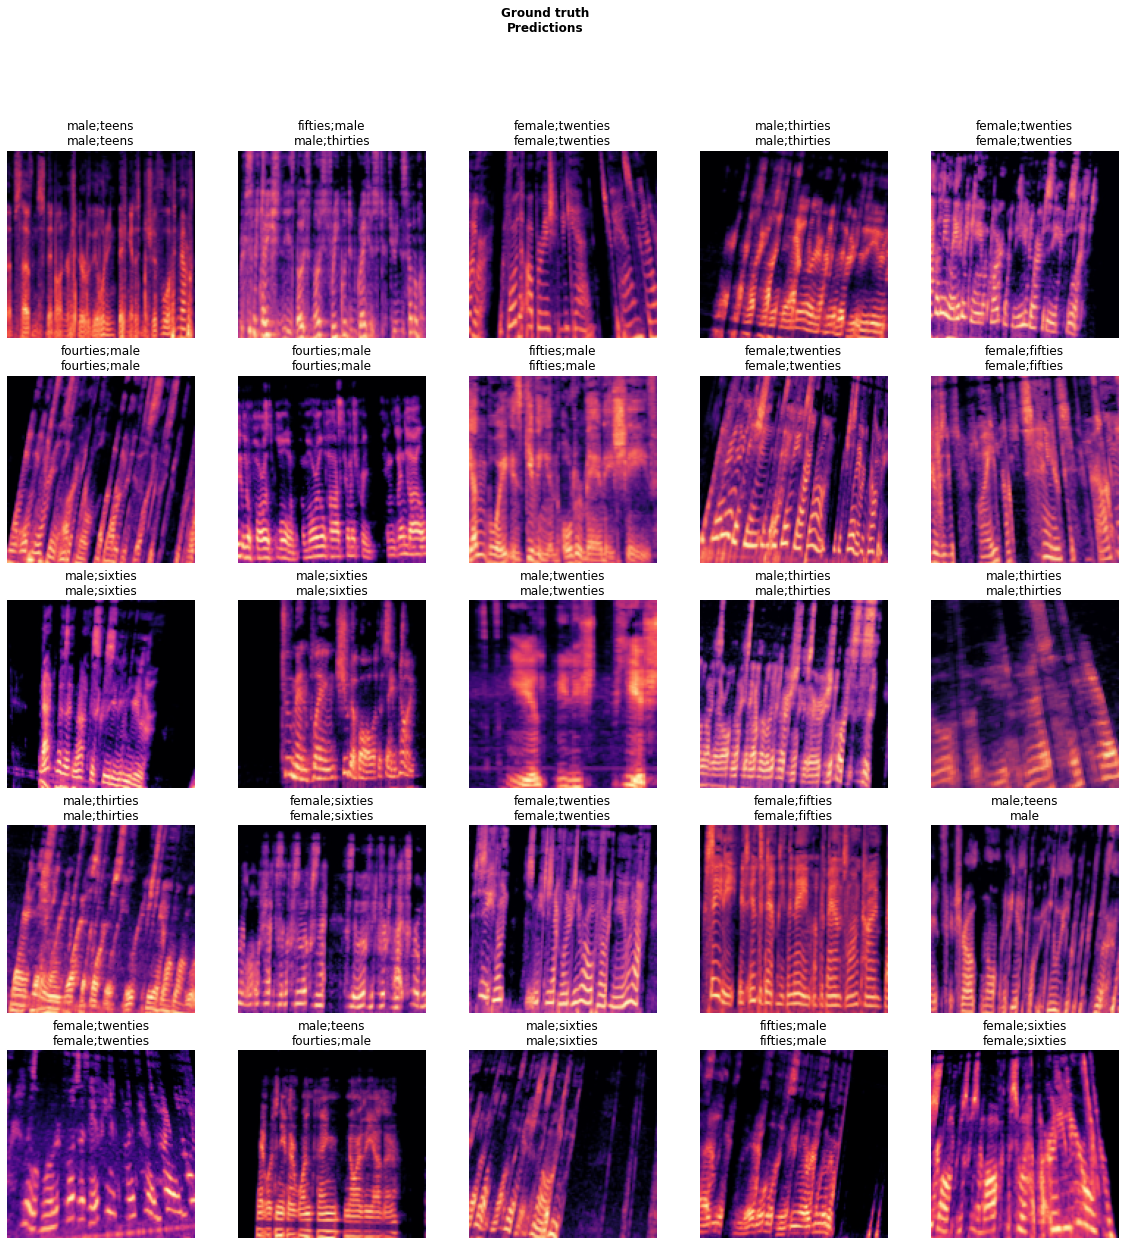

In [7]:
learn.show_results(ds_type=DatasetType.Train)

In [9]:
learn.destroy()

this Learner object self-destroyed - it still exists, but no longer usable


In [1]:
!unzip sentispectos/sentiment-spectogram.zip

Archive:  sentispectos/sentiment-spectogram.zip
   creating: sentiment-spectogram/
  inflating: sentiment-spectogram/03-01-01-01-01-01-01.jpg  
  inflating: __MACOSX/sentiment-spectogram/._03-01-01-01-01-01-01.jpg  
  inflating: sentiment-spectogram/03-01-01-01-01-01-02.jpg  
  inflating: sentiment-spectogram/03-01-01-01-01-01-03.jpg  
  inflating: sentiment-spectogram/03-01-01-01-01-01-04.jpg  
  inflating: sentiment-spectogram/03-01-01-01-01-01-05.jpg  
  inflating: sentiment-spectogram/03-01-01-01-01-01-06.jpg  
  inflating: sentiment-spectogram/03-01-01-01-01-01-07.jpg  
  inflating: sentiment-spectogram/03-01-01-01-01-01-08.jpg  
  inflating: sentiment-spectogram/03-01-01-01-01-01-09.jpg  
  inflating: sentiment-spectogram/03-01-01-01-01-01-10.jpg  
  inflating: sentiment-spectogram/03-01-01-01-01-01-11.jpg  
  inflating: sentiment-spectogram/03-01-01-01-01-01-12.jpg  
  inflating: sentiment-spectogram/03-01-01-01-01-01-13.jpg  
  inflating: sentiment-spectogram/03-01-01-01-01-01-